# Distribuciones en forma de anillo

In [5]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def ring(r_min = 0, r_max = 1, n_samples = 360):
    angle = rnd.uniform(0,2*pi, n_samples)
    distance = rnd.uniform(r_min, r_max, n_samples)
    data = []
    for a, d in zip(angle, distance):
        data.append([d*cos(a), d*sin(a)])
    return np.array(data)

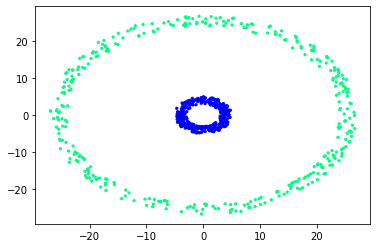

In [8]:
data1 = ring(3, 5)
data2 = ring(24, 27)

data = np.concatenate([data1, data2], axis = 0)
labels = np.concatenate([[0 for i in range(0, len(data1))], [1 for i in range(0, len(data2))]])

plt.scatter(data[:,0], data[:,1], c = labels, s = 5, cmap="winter")

# Algoritmo con Kmeans

In [9]:
from sklearn.cluster import KMeans

In [16]:
km = KMeans(2).fit(data)

In [17]:
clust = km.predict(data)

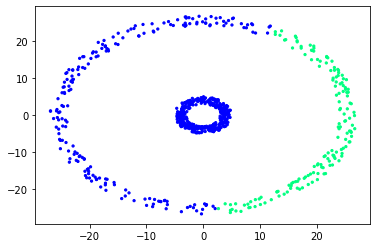

In [18]:
plt.scatter(data[:,0], data[:,1], c = clust, s=5, cmap="winter")

El algoritmo k means es incapaz de satisfacer 2 clusters con forma de anillo

# Algoritmo de los K medoides

La técnica de los *k medoides* consiste en seleccionar k puntos iniciales, para cada 1 calcular centro del cluster más cercano con cualquier punto de métrica. La diferencia está en que le centro del cluster no quedará asignado al baricentro de esos puntos si no a dicho punto en cuestión. Para cada punto, intercambiar centro del cluster con el punto y calcular una reducción en las distancias totales con respecto al centro del cluster a través de todos los miembros utilizando ese swipe. Si no mejora, no se escogerá. Se itera para todo slos puntos del dataset, siempre nos quedaremos con un punto.

In [20]:
from pyclust import KMedoids

In [22]:
kmed = KMedoids(2).fit_predict(data)

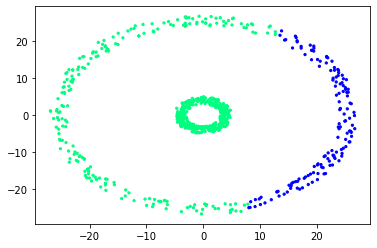

In [23]:
plt.scatter(data[:,0], data[:,1], c=kmed, s=5, cmap="winter")

No ha habido mucha mejoría utilizando este método. Habrá que cambiar el algoritmo de clustering. Igual hay que hacer una transformación lineal, u optar a otro método de clustering (jerárquico, por ejemplo), aunque también fallará.

Lo suyo es utilizar las transformaciones lineales y los valores propios del dataset.

# Algoritmo del clustering espectral

Técnica a probar si todo falla.

In [ ]:
from sklearn.cluster import SpectralClustering

In [25]:
clust = SpectralClustering(2).fit_predict(data)

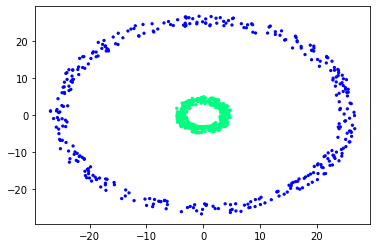

In [26]:
plt.scatter(data[:,0], data[:,1], c=clust, s=5, cmap="winter")

* Podemos estimar la k:
    * NO: Propagación de la afinidad
    * SÍ: Podemos usar la distancia Euclídea:
        * SI: K-Means
        * NO: Buscar valores centrales:
            * SI: K-Medoides
            * NO: Los datos son linealmente separables:
                * SI: Clustering aglomerativo (dendrograma)
                * NO: Clustering espectral